<h1 style="font-size: 2rem">Metabolic Control Analysis</h1>




In [2]:
pip install tellurium

     |████████████████████████████████| 122kB 7.7MB/s 
     |████████████████████████████████| 16.6MB 185kB/s 
     |████████████████████████████████| 5.6MB 40.7MB/s 
     |████████████████████████████████| 2.0MB 37.9MB/s 
     |████████████████████████████████| 36.7MB 83kB/s 
     |████████████████████████████████| 14.9MB 184kB/s 
     |████████████████████████████████| 2.5MB 44.1MB/s 
     |████████████████████████████████| 3.1MB 43.3MB/s 
     |████████████████████████████████| 5.8MB 37.0MB/s 
     |████████████████████████████████| 27.4MB 94kB/s 
     |████████████████████████████████| 6.2MB 25.0MB/s 
     |████████████████████████████████| 3.2MB 47.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

In [3]:
import sympy
from sympy import init_printing
init_printing()
import tellurium as te

## Latex Macros
Macro definitions
* relative values: \rv{x} - the relative value of x
$\newcommand{\rv}[1]{\frac{\delta #1}{#1}}$: $\rv{x}$

* normalized elasticity: \els{i}{x} - how reaction rate i is impacted by $x$
$\newcommand{\els}[2]{\epsilon_{#2}^{#1}}$: $\els{i}{x}$

* unnormalized elasticity: \uels{i}{x} - how reaction rate i is impacted by $x$
$\newcommand{\uels}[2]{\zeta_{#2}^{#1}}$: $\uels{i}{x}$

* term in local equation: \ltm{v}{x} - how a term in a kinetic equation contributes to a change in reaction rate.
$\newcommand{\ltm}[2]{\els{#1}{#2} \rv{#2}}$: $\ltm{v}{x}$

* control coefficient: \ctl{x}{b} - how $x$ changes with a change in $b$
$\newcommand{\ctl}[2]{C_{#2}^{#1}}$: $\ctl{x}{b}$

* change in species concentrations: \dxdt - how $x$ changes with respect to $t$
$\newcommand{\dxdt}[]{ \frac{d {\bf x}}{d t}}$: $\dxdt$

* change in parameter values: \dpdt - how $p$ changes with respect to $t$
$\newcommand{\dxdt}[]{ \frac{d {\bf p}}{d t}}$: $\dpdt$

* total change in reaction rate: \dv
$\newcommand{\dv}[] {d {\bf v} }$: $\dv$

* total change in state: \dx
$\newcommand{\dx}[] {d {\bf x} }$: $\dx$

* reaction rates: \vt - 
$\newcommand{\vt}[]{ \bf{v}}$ $\vt$

* change in reaction rate w.r.t. $\bf{x}$: \dvdx - 
$\newcommand{\dvdx}[]{ \frac{\partial {\bf v}}{\partial {\bf x}}}$ $\dvdx$

* change in reaction rate w.r.t. $\bf{p}$: \dvdp - 
$\newcommand{\dvdp}[]{ \frac{\partial {\bf v}}
{\partial {\bf p}}}$ $\dvdp$

* LaPlace transform of $\bf{x}$: \ltx -
$\newcommand{\ltx}[]{ {\bf \cal{L}(x)}}$ $\ltx$

* LaPlace transform of $\bf{v}$: \ltv -
$\newcommand{\ltv}[]{ {\bf \cal{L}(v)}}$ $\ltv$

* LaPlace transform of $\bf{p}$: \ltp -
$\newcommand{\ltp}[]{ {\bf \cal{L}(p)}}$ $\ltp$

* Transfer function $\bf{x}$ w.r.t. $\bf{p}$,
$\frac{\ltx}{\ltp}$: \tfx -
$\newcommand{\tfx}[]{ {\bf H_x}(s)}$ $\tfx$

* Transfer function for fluxes,
$\frac{\ltv}{\ltp}$: \tfj -
$\newcommand{\tfj}[]{ {\bf H_J}(s)}$ $\tfj$


Writing a matrix
$
\begin{equation*}
A_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{pmatrix}
\end{equation*}
$

## Notation



*   $S_i$ is the $i$-th metabolite.
*   $s_i$ is the concentration of $S_i$.
* $q_i$ is the equilibrium constant for reaction $i$.
* $\bf{N}$ is the stoichiometry matrix. $n \times r$, where $n$ is the number of species and $r$ is the number of reactions.
* $\bf{x}$ is a vector of species for the $n$ species
* $\bf{v}$ is vector of reaction rates for the $r$ reactions
* $\bf{p}$ is the vector of parameters





1.   Relative vs. absolute values. The absolute change in $x$ is $\delta x$. The relative is $\frac{\delta x}{x}$.



# Transfer Function Analysis

## State

1. $\dxdt = \bf{N} \bf{v}(\bf{x}, \bf{p})$.

1. Linearizing the right hand side, $\dxdt \approx \bf{N}\dvdx \dxdt + \bf{N} \dvdp \dpdt$.

1. Letting $A = \bf{N} \dvdx$ and $B = \bf{N} \dvdp$, we have $\dxdt \approx \bf{A}$ $  d \bf{ x }$ $+ {\bf{B}}  d \bf{p}$.

1. From (2), the LaPlace transform of both sides is
$s \cal{L}(\bf{x}) = \bf{N} \dvdx \cal{L}(x) + \bf{N} \dvdp \cal{L}(\bf{p})$. And so, $\bf{H_x}(s) = 
\frac{ \ltx }{ \ltp } =
[s \bf{I} - N \dvdx]^{-1}\bf{N} \dvdp$.

1. The canonical transfer function considers a unit change in each reaction w.r.t. $\bf{p}$.
$\tilde{\bf{H}}_x(s) = \bf{H}(\bf{x}) \left( \dvdp \right) ^{-1}$ $=[s \bf{I} - N \dvdx]^{-1}\bf{N}$.

## Flux

1. Linearizing, $\dvdt \approx \dvdx \dxdt +  \dvdp \dpdt$.

1. Letting $C = \dvdx$ and $D = \dvdp$, we have 
$\dxdt \approx \bf{C}$ $  d \bf{ x }$ $+ {\bf{D}}$  $d \bf{p}$.

1. From (2), the LaPlace transform of both sides is
$s \ltv = \dvdx \ltx + \dvdp \ltp$
$= \dvdx \tfx \ltp + \dvdp \ltp$.
And so, $\bf{H_J}(s) = \dvdx \tfx + \dvdp$.

1. The canonical transfer function considers a unit change in each reaction w.r.t. $\bf{p}$.
$\bf{\tilde{H}_J}$$(s) = \dvdx \bf{\tilde{H}_x} + \bf{I}$.

# Elasticities

1. $\els{v_i}{s} = \rv{v_i} /\rv{s_i}$ 
1. Consider elasticities for various kinetics
   1. Zeroth order kinetics: $v = k$ 
   1. Mass action: $v = k \prod_i r_i^{n_i}$, where $r_i$ is the $i$-th reactant
   1. Hill equation: $v = \frac{k_1 x^n}{k_2 + x^n}$. This includes the Haldane equation.
   1. State based kinetics. $x_0 = \sum_i x_i$.
   $v = k_1 \frac{\sum_{j \in S} k_i x_j^{n_j}}{k_2 + \sum_i k_i x_i^{n_i}}$.

1. Enzyme elascity
   1. Reversible MM: $v = V_f \frac{S/K_S}{1 + S/K_S + P/K_P}$

In [4]:
symbols = "x_1, x_2, x_3, k_1, k_2, k_3, n_1, n_2, n_3, k, I, V_f, v, V_r, s, p, k_s, k_p, V_M"
statement = "%s = sympy.symbols('%s')" % (symbols, symbols)
exec(statement)

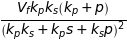

In [5]:
mmEx = V_f * (s /k_s)/ (1 + s/k_s + p/k_p)
elasS = sympy.diff(mmEx, s)
elasS.simplify()

In [6]:
mmRevEx = V_f * (s /k_s)/ (1 + s/k_s + p/k_p) - V_r * (p / k_p)/(1 + s/k_s + p/k_p)
elasRevS = sympy.diff(mmRevEx, s)
elasRevS = elasRevS.simplify()

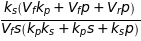

In [7]:
n, d = sympy.fraction(elasRevS)
elasRevS = (n.expand() /d) / mmEx
elasRevS.simplify()


## Mass action kinetics

In [8]:
mass_action_kin = k*(x_1**n_1)*(x_2**n_2)*(x_3**n_3)
mass_action_kin

In [9]:
mass_action_els = x_1*sympy.diff(mass_action_kin, x_1)/mass_action_kin
mass_action_els

In [10]:
def calcEls(expr, ele):
  return ele*sympy.diff(expr, ele)/expr

In [11]:
calcEls(mass_action_kin, x_2)

In [12]:
# Subscripted sequence
n, r = sympy.symbols('n, r')
a_n = sympy.Function('a')(n)
terms = 4
short_expr = sympy.Sum(a_n * r**n, (n, 0, terms - 1))
a_seq = [-1, 3, 23, 8]
coeffed_short_expr = short_expr.doit().subs(
    (a_n.subs(n, i), a_seq[i]) for i in range(terms)) 
coeffed_short_expr.subs(r, r)

In [13]:
sympy.Sum((I/3)**n,(n,0,sympy.oo)).doit()

⎧     1            │I│    
⎪   ─────      for ─── < 1
⎪       I           3     
⎪   1 - ─                 
⎪       3                 
⎪                         
⎪  ∞                      
⎨ ___                     
⎪ ╲                       
⎪  ╲    -n  n             
⎪  ╱   3  ⋅I    otherwise 
⎪ ╱                       
⎪ ‾‾‾                     
⎪n = 0                    
⎩                         

## State based kinetics

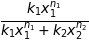

In [14]:
x1, x2, k1, k2, n1, n2 = sympy.symbols("x1, x2, k1, k2, n1, n2")
expr = (k1*x1**n1)/(k1*x1**n1 + k2*x2**n2)
expr

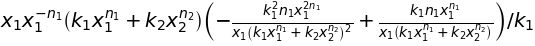

In [15]:
x1_els = x1*(sympy.diff(expr, x1)/expr)
x1_els

This can be simplified by extracting $v$.

# Control Coefficients

1.   There are two kinds of control coefficients, flux and concentration. $C^J_i$ is the flux control and $C^s_i$ is the concentration control for species $s$. We use $C_i^x$ to denote a control coefficient that may be either of the two.


2.   $C^J_i = \frac{\delta J}{J} / \frac{\delta e_i}{e_i}$, where $e_i$ is the amount of the enzyme that catylzes the $i$-th reaction.

1.   Using a first order Taylor's approximation, 
$\frac{\delta J}{J} = \sum C^J_i \frac{\delta e_i}{e_i}$.

1. We can linearize reaction rates as well, especially for mass action kinetics. Let $v_i$ be the rate for the $i$-th reaction, then 
$\delta v_i = k_{i0} \delta e_i + \sum_{j} \phi_{ij} k_{ij} \delta s_j$, where $\phi_{ij}$ is 1 if metabolite $s_j$ participates in the kinetics for reaction $i$.

1. Suppose we have:
    1.  a linear pathway of irreversible reactions so that at steady state $v_i = v_j$ for all $i,j$
    1. each enzyme affects only one reaction
    1. we make compensating changes in $E_i$ and $E_{i+1}$ such that $\delta J = 0$.

1. Then
    1. $v_i = k_i e_i s_i = k_{i+1} e_{i+1} s_{i+1} = v_{i+1}$
    1. $0 = C_i^J (\epsilon_{e_i}^i \frac{\delta e_i}{e_i} + \epsilon_{s_i}^i \frac{\delta s_i}{s_i}) + C_{i+1}^J (\epsilon_{e_{i+1}}^{i+1} \frac{\delta e_{i+1}}{e_{i+1}} + + \epsilon_{s_{i+1}}^{i+1} \frac{\delta s_{i+1}}{s_{i+1}} )$

$0 = C_i^J \frac{\delta e_i}{e_i} + C_{i+1}^J \frac{\delta e_{i+1}}{e_{i+1}}$



**Issue**: To make use of local equations, I need to have the same units, relative or absolute. There seems to be an inconsistency here.







# General Relationships

1. $\rv{J} = \sum_{s \in \cal{S}} \ctl{J}{s} \rv{s}$ for changes for all $s$ in $\cal{S}$.

1. $\rv{J} = \sum_{e \in \cal{E}} \ctl{J}{e} \rv{e}$ can be viewed as the control exerted by the flux of each reaction (if the enzymes $e$ are in a linear range). This means that if $\rv{e} =1$, then $\ctl{J}{e} / \rv{J^* }$ is the relative effect of the reaction for $e$ on $J$, where $\rv{J^* }$ is result of a unit percent change in each reaction flux.

1. Consider a collection of enzymes $\cal{E}_S$ for reactions that directly affect the concentration of $S$.
Consider an experiment in all fluxes are constant and only the concentration of $S$ changed in a way that compensates for the change in $e$. Then,
$\rv{J} = \sum_{e \in \cal{E}} \ctl{J}{e} \rv{e}$.
But for each reaction in the set, $\rv{v} = \els{v}{e} \rv{e} + \els{v}{s} \rv{s}$.
Thus, $\rv{e} = - \els{v}{s} / \els{v}{e} \rv{s}$ for each $e$.
And so, $0 = \sum_{e \in \cal{E}} \ctl{J}{e} \els{v}{s} / \els{v}{e} \rv{s}$,
which is equivalent to $0 = \sum_{e \in \cal{E}} \ctl{J}{e} \els{v}{s} / \els{v}{e}$. If we are in a linear regime for the enzymes, then
$0 = \sum_{e \in \cal{E}} \ctl{J}{e} \els{v}{s}$.

1. $\els{x}{y} \rv{y}$ is the change in 
   $x$ due to $y$ for a single reaction.

1. $\els{x}{y} / \els{x}{z} = \els{z}{y}$

1. If there is a unique enzyme for each reaction, then we can assess he contribution of each reaction using $\rv{J} = \sum_{e \in \cal{E}} \ctl{J}{e} \rv{e}$, where each $e \in \cal{E}$ refers to a distinct reaciton.

1. Consider a linear network with a single reactant and product, unique reactants, reversible reactions, and unique enzymes $e_i$ for each reaction. That is, $\cdots \rightarrow S_1 \xrightarrow{v_1} S_2 \xrightarrow{v_2} S_3 \cdots$.
   1. It must be that $J = v_i$, and so
$\rv{J} = \rv{v_i}$ at steady state.

   1. $\rv{v_i} = \els{v_i}{e_i} \rv{e_i} + \els{v_i}{s_i} \rv{s_i} + \els{v_i}{s_{i+1}} \rv{s_{i+1}}$.

   1. Suppose we conduct an experiment in which we adjust $e_{i-1}$ and $e_i$ so that $\rv{J} = 0$ such that there is a single $i^* > 1$ such that $\rv{s_{i^*}} \neq 0$.

      1. Only reactions $i^* -1$ and $i^* $ are impacted since $\rv{v_i} = 0$ for $i < i^* - 1$ since neither their reactants not products are impacted. and $\rv{v_i} = 0$ for $i > i^*$ (for the same reason).

      1. $\rv{v_{i^* }} = \els{v_{i^* }}{e_{i^* }} \rv{e_{i^* }} + \els{v_{i^* }}{s_{i^* }} \rv{s_{i^* }} = 0$.

      1. $\els{s_{i^* }}{e_{i^* }} =  \els{v_{i^* }}{e_i^* } / \els{v_{i^* }}{s_{i^* }}$.

      1. $\rv{v_{i^* -1}} = \els{v_{i^* -1 }}{e_{i^* -1}} \rv{e_{i^* -1}} + \els{v_{i ^* -1}}{s_{i^* }} \rv{s_{i^* }} = 0$. 

      1. TODO: calculate $\rv{s_i^* }$
      
      1. As a result, $\rv{e_{i^* }} / \rv{e_{i^* -1}} = 
      \phi(v_{i* -1}, e_{i^* -1}, s_{i^* }) / \phi(v_{i* }, e_{i^* }, s_{i^* })$

1. Now consider two adjacent reactions in which we change their respective enzymes in a compensating so that $\rv{J} = 0$. For convenience, we use the subscripts 1 and 2. $\cdots \rightarrow S_1 \xrightarrow{v_1} S_2 \xrightarrow{v_2} S_3 \cdots$. We assume that the experiment is conducted so that only 
the $e_i$ and $s_2$ change.
   1. $\rv{J} = \rv{v_1} = \rv{v_2} = 0$
   1. $\rv{v_1} = \ltm{v_1}{s_1} + \ltm{v_1}{e_1} + \ltm{v_1}{s_2} = \ltm{v_1}{e_1} + \ltm{v_1}{s_2} = 0$
   1. $\rv{v_2} = \ltm{v_2}{e_2} + \ltm{v_2}{s_2} = 0$
   1. So, $\ltm{v_1}{e_1} = - \ltm{v_1}{s_2}$ and
   $\ltm{v_2}{e_2} = - \ltm{v_2}{s_2}$. Hence, 
   $\rv{e_1} = -\els{v_1}{s_2} / \els{v_1}{e_1} \rv{s_2}$.
   Similarly, $\rv{e_2} = -\els{v_2}{s_2} / \els{v_2}{e_2} \rv{s_2}$.

1. Suppose that enzyme flux elasticity is 1 and we make compensating changes in 
a set of enzymes $\cal{E}$ such that $\delta J = 0$ and only one chemical species changes, $S$, and for all reactions $i$ for which $\delta e_i \neq 0$,
there is an $S$ in the reaction. Then,
    * $0 = \rv{J} = \sum_{e \in \cal{E}} \ctl{J}{e} \rv{e}$
    * $\delta v = \delta e + \els{v}{s} \delta s$
    * Assuming that $\delta v = 0$, then $\delta e = - \els{v}{s} \delta s$.
    * $0 = \sum_i - \ctl{J}{v_i} \els{v_i}{s} \delta s 
    \equiv \sum_i \ctl{J}{v_i} \els{v_i}{s} = 0$

# Connectivity Theorems

## Framework

1. Flux can change but designated species concentrations do not. (Non-designated species concentrations likely will change.)
1. Consider $S^{\prime} \xrightarrow{v_1} S \xrightarrow{v_2} S^{\prime \prime} \xrightarrow{v_3 }$. The reactions are reversible.

1. Observed that $\rv{J} = \rv{v_i}$.

1. Assume that $\rv{e_1} \neq 0 \neq \rv{e_2}$ so that $\rv{J} = 0$
and so $\rv{v_i} = 0$.
However, $S$ does change. 

1. Since $\rv{v_1} = \rv{v_2}$, 
$\els{v_1}{e_1} \rv{e_1} - \rv{s}\els{v_1}{s} = -\els{v_2}{e_2} \rv{e_2} - \els{v_2}{s} \rv{s}$.

1. $\rv{s_2} = \els{s_2}{e_2} \rv{e_2} + \els{s}{e_2} \rv {e_2}$.

1. Substituting, we have
$\els{v_1}{e_1} \rv{e_1} = \els{v_2}{e_2} \rv{e_2} + \els{v_2}{s_2}
( \els{s_2}{e_1} \rv{e_1} + \els{s_2}{e_2} \rv {e_2})$.

1. How do I extract $e_i$? Let $r = \rv{e_1} / \rv{e_2}$. Then,
$\els{v_1}{e_1} r = \els{v_2}{e_2}  + \els{v_2}{s_2}
( \els{s_2}{e_1} r + \els{s_2}{e_2})$ and so
$r = \frac{
  \els{v_2}{e_2}  + \els{v_2}{s_2} \els{s_2}{e_2}}{\els{v_1}{e_1} - \els{v_2}{s_2}}$. Notice the singularity when $\els{v1}{e_1} = \els{v_2}{s_2}$. Also, note that the requirement that $\els{v1}{e_1} > \els{v_2}{s_2}$.

# Linear pathways

Consider a linear pathway in which reaction $i$ converts $S_i$ to $S_{i+1}$ at a rate $k_i e_i s_i$, and 
and the reverse reaction has kinetics constant $k_{-i}$.
Note that this payway assumes that uni-uni reactions with a moderator (enzyme).

1.    $v_i = e_i(s_i k_i - s_{i+1} k_{-1})$
1. $\rho_i$ is the disequilibrium constant for reaction $i$, where $\frac{s_{i+1}}{s_i}/q_i$. This is in $[0, \infty)$. 
    1. $\rho_i = 1$ if $v_i = 0$.
    1. $\rho_i = 0$ if $k_{-i} = 0$. That is, reaction $i$ is irreversible.
    1. $\rho_i = \infty$ if $s_i = 0$.
1. $v_i = k_i (s_i - s_{i+1}/q_i)$
1. Further, $v_i = k_is_i(1 - \rho_i)$

Find the relationships between pairs of $C_i^J$. Consider an experiment in which all metabolite concentrations are kept constant and enzyme concentrations are changed in a manner so that flux does not change.
1. By construction of the experiment, $\rv{J} = \sum C_i^J \els{v_i}{e} \rv{e}$.
1. $v_i = v_j$ for all $i,j$ since this is a linear pathway.
1. $\els{v_i}{e_i} \rv{e_i} = \rv{v_i}$.
1. So, $\rv{J} = \rv{v_j}$ for all reactions in a
linear pathway.
1. We conclude
$\rv{J} = \sum C_i^J \rv{v_i} = \sum C_i^J \rv{J} \equiv 1 = \sum C_i^J$.
1. An easier derivation of the above is to note that
   1. $\rv{J} = \sum C_i^J \rv{v_i}$.
   1. $v_i = J = v_j$, if the stoichiometries are all 1.
   1. $v_i = J =  v_j$ it must be that $\rv{v_i} = \rv{J} = \rv{v_j}$.
   1. Since the change is non-zero, we can divide, which yields the conclusion.

Now consider concentrations.

Now consider a set of compensating changes for $i \in S$.
Note that
$\sum_{i \in S} C_i^x \epsilon_e^i = 0$, where $x$ indicates that the
change may be in flux or concentrations.

1. This can be generalized slight to consider a set of changes in enzyme concentrations that result in a known change, and so the right hand side need not be 0.

# Generalizing Linear Pathways

Can this be generalized further beyond linear pathways? And, should this apply to species as well as flux? For a general reaction network, we can't equate the reaction rates, and so must include the changes in enzymes. 

Let $C_i^x$ denote a control coefficient for flux or concentration, and
$i \in S$ be a set of compensating changes.
Note that
$\sum_{i \in S} C_i^x \epsilon_e^i \frac{\delta e_i}{e_i} = 0$.

# One Step Linear Pathway

## State

1. Consider the reversible reaction $X_0 \xrightarrow{v_1} x \xrightarrow{v_2} X_1$, where $X_i$ is a fixed species.
1. $\dvdx = 
\begin{equation*}
\begin{pmatrix}
\zeta_x^1  \\
\zeta_x^2   \\
\end{pmatrix}
\end{equation*}
$
1. $N = 
\begin{equation*}
\begin{pmatrix}
1 & -1  \\
\end{pmatrix}
\end{equation*}
$
1. $N \dvdx = \zeta_x^1 - \zeta_x^2$
1. $\dvdx N =  
\begin{equation*}
\begin{pmatrix}
\zeta_x^1 & -\zeta_x^1 \\
\zeta_x^2 & -\zeta_x^2 \\
\end{pmatrix}
\end{equation*}
$
1. $sI - N \dvdx = s - \zeta_x^1 + \zeta_x^2$
1. $\left( sI - N \dvdx \right)^{-1} = \frac{1}{s - \zeta_x^1 + \zeta_x^2}$
1. ${\cal C}_x = \left( sI - N \dvdx \right) ^{-1} N =
\begin{equation*}
\begin{pmatrix}
\frac{1}{s - \zeta_x^1 + \zeta_x^2} & \frac{-1}{s - \zeta_x^1 + \zeta_x^2}  \\
\end{pmatrix}
\end{equation*}
$

## Flux

$\dv = \dvdx \bf{x} + \dvdp \bf{p}$

$\begin{align}
\dv & = & \dvdx \bf{x} & + & \dvdp \bf{p} \\
s V(s) & = & \dvdx X(s) & +  & \dvdp P(s) \\
s V(s) & = & \dvdx N V(s) & + & \dvdp P(s) \\
\left( sI - \dvdx N \right) V(s)  & = & \dvdp P(s) \\
H_J(s) & = &\left( sI - \dvdx N \right)^{-1} \dvdp
\end{align}
$

# Two Step Linear Pathway

Formulation: $X_0 \xrightarrow{v_1} x_1 \xrightarrow{v_2} x_2 \xrightarrow{v_3} X_1$.

$
\begin{equation*}
N = 
\begin{pmatrix}
1 & -1 & 0 \\
0 & 1 & -1 \\
\end{pmatrix}
\end{equation*}
$

$
\begin{equation*}
\dvdx = 
\begin{pmatrix}
\uels{1}{1} & \uels{1}{2} \\
\uels{2}{1} & \uels{2}{2} \\
\uels{3}{1} & \uels{3}{2} \\
\end{pmatrix}
\end{equation*}
$

Assuming mass action kinetics:
$
\begin{equation*}
\dvdx = 
\begin{pmatrix}
 0 & 0 \\
k_1 & 0 \\
0 & k_2 \\
\end{pmatrix}
\end{equation*}
$

The contribution of each species on other species is
indicated by:
$
\begin{equation*}
N \dvdx = 
\begin{pmatrix}
-k_1 & 0 \\
k_1 & -k_2 \\
\end{pmatrix}
\end{equation*}
$

The homogeneous differential equation for this system is
$
\dx =
A \bf{x}
$,
where $A = N \dvdx$.
And, a solution is $c \bf{x}_s e^{- \lambda}$,
where $\lambda$ is an eigenvalue, $\bf{x}_s$ is
its eigenvector, and $c$ is a constant.
Note that the eigenvalues are $-k_1, -k_2$
with the associated
eigenvectors
$
\begin{equation*}
\begin{pmatrix}
\frac{k_2}{k_1} - 1 \\
1
\end{pmatrix}
\end{equation*}
$,
$
\begin{equation*}
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\end{equation*}
$.

That is, the complementary (homogeneous) solution is
$
\begin{equation*}
{\bf x}_c (t) = 
c_1 
\begin{pmatrix}
\frac{k_2}{k_1} - 1 \\
1
\end{pmatrix}
e^{-k_1 t}
+ 
c_2 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
e^{-k_2 t}
\end{equation*}
$, for $k_1 \neq k_2$.
Note that $c_i = x_i (0)$.

In matrix form,
let
$
\begin{equation*}
{\bf x}_1 (t) = 
\begin{pmatrix}
\frac{k_2}{k_1} - 1 \\
0
\end{pmatrix}
e^{-k_1 t}
\end{equation*}
$, 
$
\begin{equation*}
{\bf x}_2 (t) = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
e^{-k_2 t}
\end{equation*}
$,
and
$
\begin{equation*}
{\bf X} =
\begin{pmatrix}
{\bf x}_1 & {\bf x}_2
\end{pmatrix}
\end{equation*}
$.

We also have the effect of parameters. In this case, the only parameter that's present is $X_0$.
$
\begin{equation*}
\dvdp = 
\begin{pmatrix}
\frac{\partial v_1}{\partial X_0} \\
0 \\
0 \\
\end{pmatrix}
=
\begin{pmatrix}
k_0 \\
0 \\
0 \\
\end{pmatrix}
\end{equation*}
$
The full solution is
$
\begin{align*}
{\bf x}^{\prime} & = & {\bf A} {\bf x} + \dvdp {\bf p} \\
& = & {\bf A} {\bf x} +
\begin{pmatrix}
k_0 \\
0 \\
0 \\
\end{pmatrix} X_0
\end{align*}
$

As is standard practice, we solve for the particular solution.
$
\begin{align*}
{\bf x}_p = 
{\bf X}_c {\bf u}(t)
\end{align*}
$,
where $u_i(t)$ is for state variable $i$
and
$
\begin{equation*}
{\bf u}(t) = 
\begin{pmatrix}
u_1(t) \\
u_2(t) \\
\end{pmatrix}
\end{equation*}
$.
So,
$
\begin{align*}
{\bf x}_p^{\prime} 
=
{\bf A} {\bf x}_p 
+ {\bf r}(t)
\end{align*}
$,
where ${\bf r}(t)$ is dimensioned as the state vector.
Substituting,
$
\begin{align*}
\left( 
  {\bf X}_c {\bf u}(t)
\right)^{\prime} & = &
A 
  {\bf X}_c {\bf u}(t)
+ {\bf r}(t) \\
{\bf X}^{\prime}_c {\bf u}(t) + {\bf X}_c {\bf u}^{\prime}(t) 
 & = & A {\bf X}_c {\bf u}(t) + {\bf r} (t) \\
{\bf X}_c {\bf u}^{\prime} (t) & = &  {\bf r} (t) \\
{\bf u}^{\prime} (t) & = & \left( {\bf X}_c \right)^{-1} {\bf r}(t) \\
{\bf u}(t) & = & \int \left( {\bf X}_c \right)^{-1} {\bf r}(t) \\
\end{align*}
$

$
\begin{equation*}
{\bf X}_c =
\left[
\begin{pmatrix}
\frac{k_2}{k_1} - 1 \\
1
\end{pmatrix}
e^{-k_1 t},
\begin{pmatrix}
0 \\
1
\end{pmatrix}
e^{-k_2 t}
\right]
\end{equation*}
$, and so
$
\begin{equation*}
{\bf X}_c^{-1} =
\left[
\begin{pmatrix}
\frac{k_1}{k_2 - k_1}  \\
1
\end{pmatrix}
e^{k_1 t},
\begin{pmatrix}
0 \\
1
\end{pmatrix}
e^{k_2 t}
\right]
\end{equation*}
$

$
\begin{equation*}
{\bf u}(t) =
\int {\bf X}_c^{-1} {\bf r}(t) =
  X_0 \frac{1}{k_1}
\begin{pmatrix}
\frac{k_1}{k_2 - k_1}  \\
1
\end{pmatrix}
e^{k_1 t}
\end{equation*}
$

$
\begin{align*}
{\bf x}_p & =  & {\bf X}_c {\bf u}(t) \\
& = &
\frac{X_0}{k_1}
\begin{pmatrix}
\frac{k_2 - k_1}{k_1}e^{-k_1 t} & 0 \\
e^{-k_1 t} & e^{-k_2 t} \\
\end{pmatrix}
\begin{pmatrix}
\frac{k_1}{k_2 - k_1}  \\
1
\end{pmatrix}
e^{k_1 t}
\end{align*}
$

In [22]:
k1, k2, mat = sympy.symbols(["k1", "k2", "mat"])
mat = sympy.Matrix([ [-k1, 0], [k1, -k2]])
mat.eigenvals()

In [23]:
mat.eigenvects()

⎡⎛        ⎡⎡     k₂⎤⎤⎞                 ⎤
⎢⎜        ⎢⎢-1 + ──⎥⎥⎟  ⎛        ⎡⎡0⎤⎤⎞⎥
⎢⎜-k₁, 1, ⎢⎢     k₁⎥⎥⎟, ⎜-k₂, 1, ⎢⎢ ⎥⎥⎟⎥
⎢⎜        ⎢⎢       ⎥⎥⎟  ⎝        ⎣⎣1⎦⎦⎠⎥
⎣⎝        ⎣⎣   1   ⎦⎦⎠                 ⎦

**Find the inhomogeneous solution.**

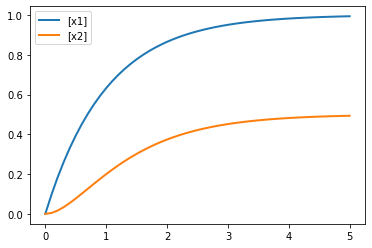

In [17]:
model = """
J0: $X0 -> x1; k0*X0
J1: x1 -> x2; k1*x1
J2: x2 -> $X1; k2*x2

X0 = 1
k0 = 1
k1 = 1
k2 = 2
X1 = 2
"""

rr = te.loada(model)
rr.plot(rr.simulate())

# Notes

1. Tellurium can conduct experiments with species fixed by indicating fixed species in the model. Below is an analysis to verify the relationship between changing enzymes and concentrations.

In [ ]:
import tellurium as te
model = """
R1: $S1 -> S2; e1*k1_f*S1 - k1_r*S2
R2: S2 -> $S3; e2*k2_f*S2 - k2_r*S3

S1 = 10
S2 =0
S3 = 10
k1_f = 1
k1_r = 0.5
k2_f = 2
k2_r = 1
e1 = 1
e2 = 1
"""

rr = te.loada(model)
rr.plot(rr.simulate())

In [ ]:
e1Factor = -rr.getEE("R1", "S2")/rr.getEE("R1", "e1")
print("e1Factor: %f" % e1Factor)
#
e2Factor = -rr.getEE("R2", "S2")/rr.getEE("R2", "e2")
print("e2Factor: %f" % e2Factor)

baselineS2 = rr.getSteadyStateValues()[0]

In [ ]:
fracChange = 0.1
newE1 = e1Factor*fracChange
newE2 = e2Factor*fracChange
rr["e1"] = newE1
rr["e2"] = newE2
rr.reset()
rr.plot(rr.simulate(0, 20, 200))